In [69]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
a = pd.read_csv('insurance.csv')
a.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
a.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [72]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


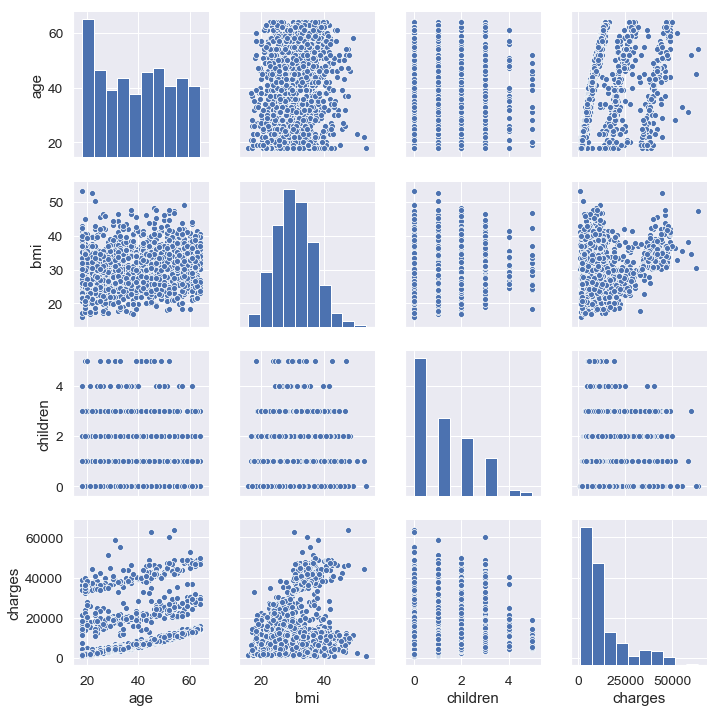

In [73]:
sns.pairplot(a)

In [74]:
a.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

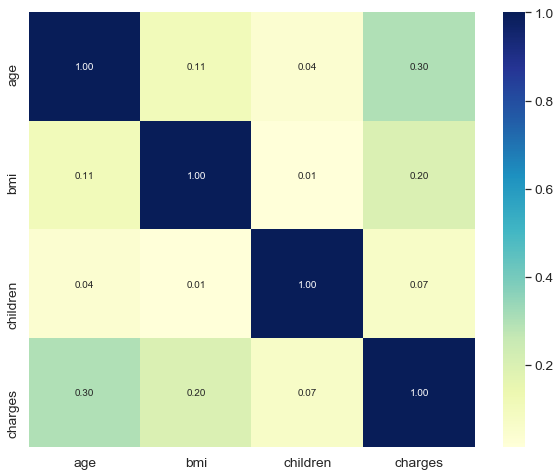

In [75]:
corr = a.corr()
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(a.corr(),annot=True,fmt='.2f',cmap="YlGnBu")
sns.set(font_scale=1.25)
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x2ec22550>,
 'caps': [<matplotlib.lines.Line2D at 0x2ec22c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ec22128>],
 'medians': [<matplotlib.lines.Line2D at 0x2ec2d390>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ec2d710>],
 'means': []}

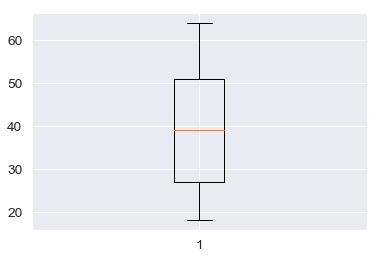

In [77]:
#Capping and Flooring
plt.boxplot(a["age"],0,'o')

{'whiskers': [<matplotlib.lines.Line2D at 0x2fea4eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x2ec5b5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2fea4a58>],
 'medians': [<matplotlib.lines.Line2D at 0x2ec5bcf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ec5be10>],
 'means': []}

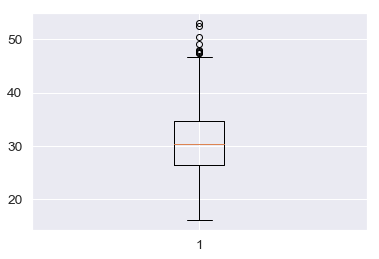

In [79]:
#Capping and Flooring
plt.boxplot(a["bmi"],0,'o')

In [81]:
a['bmi'].quantile([0,0.1,0.2,0.25,0.5,0.75,0.8,0.9,0.99,1])

0.00    15.96000
0.10    22.99000
0.20    25.32600
0.25    26.29625
0.50    30.40000
0.75    34.69375
0.80    35.86000
0.90    38.61950
0.99    46.40790
1.00    53.13000
Name: bmi, dtype: float64

In [86]:
a['dev_bmi']=a['bmi'].map(lambda x: 38 if x>38 else x)

{'whiskers': [<matplotlib.lines.Line2D at 0x3057a3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x3057ab70>,
 'boxes': [<matplotlib.lines.Line2D at 0x30589f28>],
 'medians': [<matplotlib.lines.Line2D at 0x305a22b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x305a25f8>],
 'means': []}

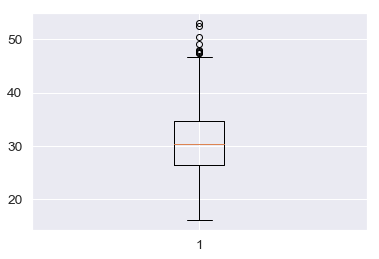

In [87]:
#Capping and Flooring
plt.boxplot(a["bmi"],0,'o')

In [88]:
a['charges'].quantile([0.1,0.25,0.5,0.75,0.9,0.91,0.95,1])

0.10     2346.533615
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
0.90    34831.719700
0.91    36212.242322
0.95    41181.827787
1.00    63770.428010
Name: charges, dtype: float64

In [59]:
def outlier_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3.5
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print(outliers)
    return len(outliers), outliers

In [60]:
charges_outliers_number, charges_outliers = outlier_zscore(a.charges)

[63770.42801, 58571.074479999996, 60021.39897, 62592.87309]


In [89]:
a.head()

,age,sex,bmi,children,smoker,region,charges,dev_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,27.900
1,18,male,33.770,1,no,southeast,1725.55230,33.770
2,28,male,33.000,3,no,southeast,4449.46200,33.000
3,33,male,22.705,0,no,northwest,21984.47061,22.705
4,32,male,28.880,0,no,northwest,3866.85520,28.880


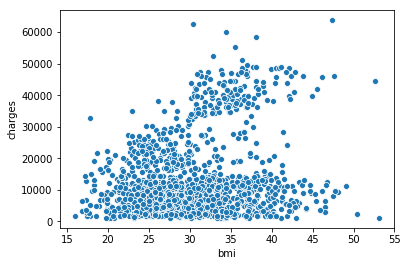

In [12]:
sns.scatterplot(x='bmi',y='charges',data=a)

In [105]:
a=pd.get_dummies(a,drop_first=True)
a.head()

,age,bmi,children,charges,dev_bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,27.900,0,1,0,0,1
1,18,33.770,1,1725.55230,33.770,1,0,0,1,0
2,28,33.000,3,4449.46200,33.000,1,0,0,1,0
3,33,22.705,0,21984.47061,22.705,1,0,1,0,0
4,32,28.880,0,3866.85520,28.880,1,0,1,0,0


In [106]:
x=a.iloc[:,[0,1,2,4,5,6,7,8,9]]
y=a.iloc[:,3]
x.head()

,age,bmi,children,dev_bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,27.900,0,1,0,0,1
1,18,33.770,1,33.770,1,0,0,1,0
2,28,33.000,3,33.000,1,0,0,1,0
3,33,22.705,0,22.705,1,0,1,0,0
4,32,28.880,0,28.880,1,0,1,0,0


In [109]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 0)

In [110]:
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
y_pred = model.predict(X_test)

In [112]:
model.score(X_test,y_test)

0.7961201522666094